# Economic Impact of Advancing Women’s Education, Employment & Leadership

## Imports

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import pylab as pl
import numpy as np
import seaborn as sb
from sklearn import cross_validation
from sklearn import linear_model, metrics
sb.set_style("darkgrid")
%matplotlib inline

In [2]:
df = pd.read_csv('tablereset.csv')

In [3]:
df.describe()

/Users/Geraldine/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,"Children in employment, study and work, female (% of female children in employment, ages 7-14)","Contributing family workers, female (% of female employment)","Educational attainment, Doctoral or equivalent, population 25+, female (%) (cumulative)","Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)","Educational attainment, at least Master's or equivalent, population 25+, female (%) (cumulative)","Educational attainment, at least completed lower secondary, population 25+, female (%) (cumulative)","Educational attainment, at least completed post-secondary, population 25+, female (%) (cumulative)","Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative)","Educational attainment, at least completed upper secondary, population 25+, female (%) (cumulative)","Employers, female (% of female employment)",...,"Self-employed, female (% of female employment)","Share of youth not in education, employment, or training, female (% of female youth population)","Tertiary education, academic staff (% female)","Unemployment with primary education, female (% of female unemployment)","Unemployment with secondary education, female (% of female unemployment)","Unemployment with tertiary education, female (% of female unemployment)","Unemployment, female (% of female labor force) (national estimate)","Unemployment, youth female (% of female labor force ages 15-24) (national estimate)","Wage and salaried workers, female (% of female employment)","Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)"
count,4.000000,29.000000,23.000000,28.000000,28.000000,31.000000,18.000000,29.000000,33.000000,29.000000,...,30.000000,27.000000,33.000000,27.000000,27.000000,27.000000,51.000000,41.000000,30.000000,4.000000
mean,88.128980,3.493103,0.629638,19.469816,8.665070,78.518512,30.520836,90.565659,61.821123,2.134483,...,13.730000,13.271852,39.321818,29.562963,45.029630,24.685185,9.288235,21.719512,85.520000,63.475000
std,13.485882,6.439495,0.501157,8.534624,6.541085,19.713922,10.254028,11.244328,19.830624,0.877202,...,8.357782,8.122207,12.127504,11.778603,12.921176,8.194215,6.374909,15.032369,9.791953,16.444123
min,68.757940,0.000000,0.000000,6.358740,0.400440,33.451850,14.134270,58.771630,24.360410,0.800000,...,4.300000,4.640000,10.730000,10.500000,20.000000,10.900000,0.800000,5.400000,56.500000,47.200000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,100.000000,29.400000,1.894690,35.015930,27.448280,99.814880,52.693240,100.000000,91.041470,3.900000,...,39.800000,34.980000,60.750000,62.500000,72.600000,43.100000,30.200000,58.100000,95.600000,86.300000


## Refine data

In [4]:
df_dropcolumns = df.dropna(thresh=35, axis=1)

In [5]:
df_dropcolumns.describe()

,"Employment to population ratio, 15+, female (%) (national estimate)","Employment to population ratio, ages 15-24, female (%) (national estimate)",GDP (current US$),GDP growth (annual %),GDP per capita (current US$),GDP per capita growth (annual %),"Gross enrolment ratio, pre-primary, female (%)","Labor force participation rate for ages 15-24, female (%) (national estimate)","Labor force participation rate, female (% of female population ages 15+) (national estimate)","Population, female (% of total)",Proportion of seats held by women in national parliaments (%),"School enrollment, primary, female (% gross)","School enrollment, secondary, female (% gross)","School enrollment, tertiary, female (% gross)","Unemployment, female (% of female labor force) (national estimate)","Unemployment, youth female (% of female labor force ages 15-24) (national estimate)"
count,44.000000,40.000000,8.100000e+01,80.000000,81.000000,80.000000,45.000000,40.000000,46.000000,80.000000,77.000000,51.000000,45.000000,48.000000,51.000000,41.000000
mean,47.222727,33.207500,8.825580e+11,2.947125,21842.318272,1.964125,76.838889,40.307500,50.984783,50.242750,23.494805,104.597843,94.979333,56.300000,9.288235,21.719512
std,12.855274,17.268296,2.343598e+12,2.667133,24596.601218,2.297964,29.617107,16.774299,12.692569,3.018201,10.995500,8.386376,25.332193,28.301373,6.374909,15.032369
min,9.700000,3.500000,1.717862e+09,-6.550000,573.570000,-3.560000,14.400000,6.100000,12.000000,26.320000,3.100000,85.810000,23.500000,3.670000,0.800000,5.400000
25%,NaN,NaN,2.776081e+10,NaN,3365.710000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.360800e+11,NaN,12324.940000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.451590e+11,NaN,38139.420000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,73.699997,72.099998,1.739310e+13,10.280000,116612.880000,8.020000,126.470000,77.100000,77.400000,53.710000,53.100000,140.630000,152.120000,100.700000,30.200000,58.100000


In [6]:
df_dropcolumns[['GDP per capita (current US$)','School enrollment, primary, female (% gross)','School enrollment, tertiary, female (% gross)','Employment to population ratio, 15+, female (%) (national estimate)','Proportion of seats held by women in national parliaments (%)']].describe()

,GDP per capita (current US$),"School enrollment, primary, female (% gross)","School enrollment, tertiary, female (% gross)","Employment to population ratio, 15+, female (%) (national estimate)",Proportion of seats held by women in national parliaments (%)
count,81.000000,51.000000,48.000000,44.000000,77.000000
mean,21842.318272,104.597843,56.300000,47.222727,23.494805
std,24596.601218,8.386376,28.301373,12.855274,10.995500
min,573.570000,85.810000,3.670000,9.700000,3.100000
25%,3365.710000,NaN,NaN,NaN,NaN
50%,12324.940000,NaN,NaN,NaN,NaN
75%,38139.420000,NaN,NaN,NaN,NaN
max,116612.880000,140.630000,100.700000,73.699997,53.100000


In [7]:
df_dropcolumns.head(80)

,Country Name,"Employment to population ratio, 15+, female (%) (national estimate)","Employment to population ratio, ages 15-24, female (%) (national estimate)",GDP (current US$),GDP growth (annual %),GDP per capita (current US$),GDP per capita growth (annual %),"Gross enrolment ratio, pre-primary, female (%)","Labor force participation rate for ages 15-24, female (%) (national estimate)","Labor force participation rate, female (% of female population ages 15+) (national estimate)","Population, female (% of total)",Proportion of seats held by women in national parliaments (%),"School enrollment, primary, female (% gross)","School enrollment, secondary, female (% gross)","School enrollment, tertiary, female (% gross)","Unemployment, female (% of female labor force) (national estimate)","Unemployment, youth female (% of female labor force ages 15-24) (national estimate)"
0,Afghanistan,NaN,NaN,2.005019e+10,1.31,633.95,-1.71,NaN,NaN,NaN,48.46,27.7,91.76,39.67,3.67,NaN,NaN
1,Albania,NaN,NaN,1.321986e+10,1.80,4568.57,1.91,87.46,NaN,NaN,50.26,20.0,111.17,92.61,73.83,15.2,NaN
2,Argentina,43.799999,23.400000,5.297260e+11,-2.56,12324.94,-3.56,NaN,30.2,47.8,51.07,36.6,NaN,NaN,NaN,8.4,22.4
3,Armenia,NaN,NaN,1.160951e+10,3.60,3861.92,3.12,NaN,NaN,NaN,52.78,10.7,NaN,NaN,48.50,NaN,NaN
4,Australia,55.000000,58.000000,1.454680e+12,2.50,61995.83,0.99,NaN,66.2,58.6,50.02,26.0,NaN,NaN,NaN,6.2,12.5
5,Austria,52.299999,49.900002,4.383760e+11,0.64,51322.64,-0.09,101.22,55.4,55.3,50.96,32.2,101.70,96.93,87.60,5.4,9.9
6,Bangladesh,NaN,NaN,1.728850e+11,6.06,1086.80,4.78,NaN,NaN,NaN,49.51,19.8,NaN,NaN,11.39,NaN,NaN
7,Barbados,NaN,NaN,4.352734e+09,0.20,15360.06,-0.11,85.67,NaN,NaN,52.07,16.7,94.17,110.68,NaN,NaN,NaN
8,Belize,NaN,NaN,1.717862e+09,4.08,4884.37,1.86,50.83,NaN,NaN,50.12,3.1,108.95,81.71,NaN,NaN,NaN
9,Bolivia,NaN,NaN,3.299624e+10,5.46,3124.09,3.84,NaN,NaN,NaN,49.91,53.1,NaN,NaN,NaN,NaN,NaN


In [8]:
df_dropcolumns.columns

Index([u'Country Name',
       u'Employment to population ratio, 15+, female (%) (national estimate)',
       u'Employment to population ratio, ages 15-24, female (%) (national estimate)',
       u'GDP (current US$)', u'GDP growth (annual %)',
       u'GDP per capita (current US$)', u'GDP per capita growth (annual %)',
       u'Gross enrolment ratio, pre-primary, female (%)',
       u'Labor force participation rate for ages 15-24, female (%) (national estimate)',
       u'Labor force participation rate, female (% of female population ages 15+) (national estimate)',
       u'Population, female (% of total)',
       u'Proportion of seats held by women in national parliaments (%)',
       u'School enrollment, primary, female (% gross)',
       u'School enrollment, secondary, female (% gross)',
       u'School enrollment, tertiary, female (% gross)',
       u'Unemployment, female (% of female labor force) (national estimate)',
       u'Unemployment, youth female (% of female labor force ag

In [9]:
df_dropcolumns.isnull().sum()

Country Name                                                                                     0
Employment to population ratio, 15+, female (%) (national estimate)                             37
Employment to population ratio, ages 15-24, female (%) (national estimate)                      41
GDP (current US$)                                                                                0
GDP growth (annual %)                                                                            1
GDP per capita (current US$)                                                                     0
GDP per capita growth (annual %)                                                                 1
Gross enrolment ratio, pre-primary, female (%)                                                  36
Labor force participation rate for ages 15-24, female (%) (national estimate)                   41
Labor force participation rate, female (% of female population ages 15+) (national estimate)    35
Population

In [10]:
df_dropcolumns.to_csv('df_droupcolumns.csv')

## Correlation Heat Map

Axes(0.125,0.125;0.62x0.775)


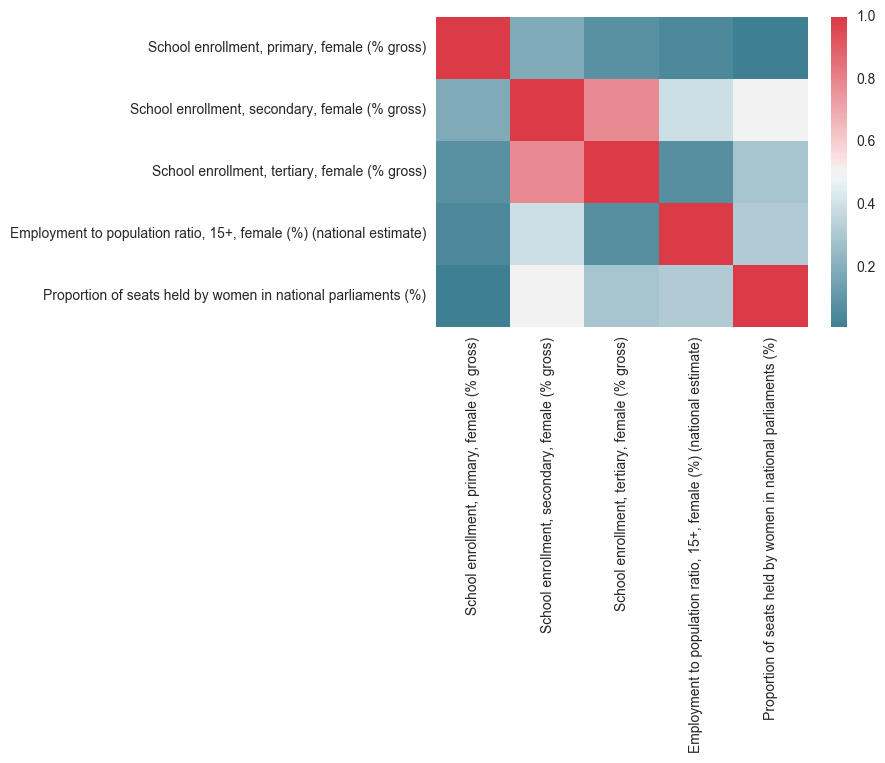

In [11]:
cmap = sb.diverging_palette(220, 10, as_cmap=True)

correlations = df_dropcolumns[['School enrollment, primary, female (% gross)', 'School enrollment, secondary, female (% gross)', 'School enrollment, tertiary, female (% gross)','Employment to population ratio, 15+, female (%) (national estimate)','Proportion of seats held by women in national parliaments (%)']].corr()
#print correlations
print sb.heatmap(correlations, cmap=cmap)

Axes(0.125,0.125;0.62x0.775)


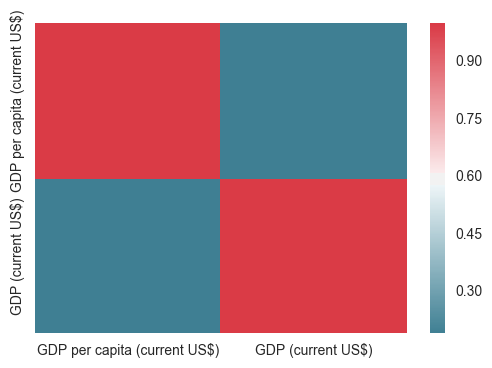

In [12]:
cmap = sb.diverging_palette(220, 10, as_cmap=True)

correlations = df_dropcolumns[['GDP per capita (current US$)','GDP (current US$)']].corr()
#print correlations
print sb.heatmap(correlations, cmap=cmap)

Axes(0.125,0.125;0.62x0.775)


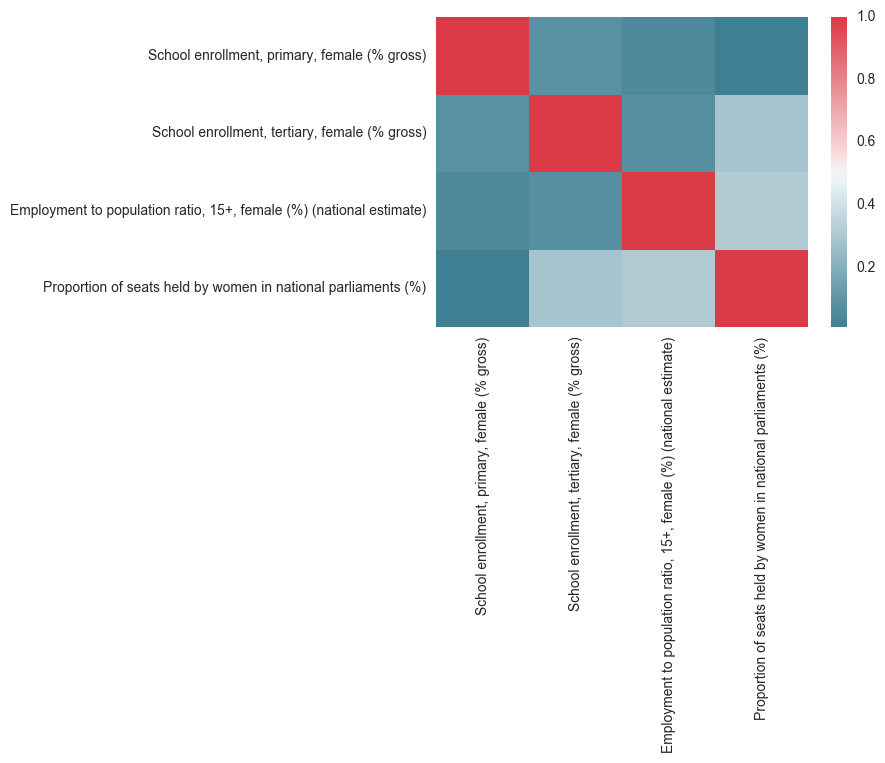

In [13]:
cmap = sb.diverging_palette(220, 10, as_cmap=True)

correlations = df_dropcolumns[['School enrollment, primary, female (% gross)','School enrollment, tertiary, female (% gross)','Employment to population ratio, 15+, female (%) (national estimate)','Proportion of seats held by women in national parliaments (%)']].corr()
#print correlations
print sb.heatmap(correlations, cmap=cmap)

## Bar Plot

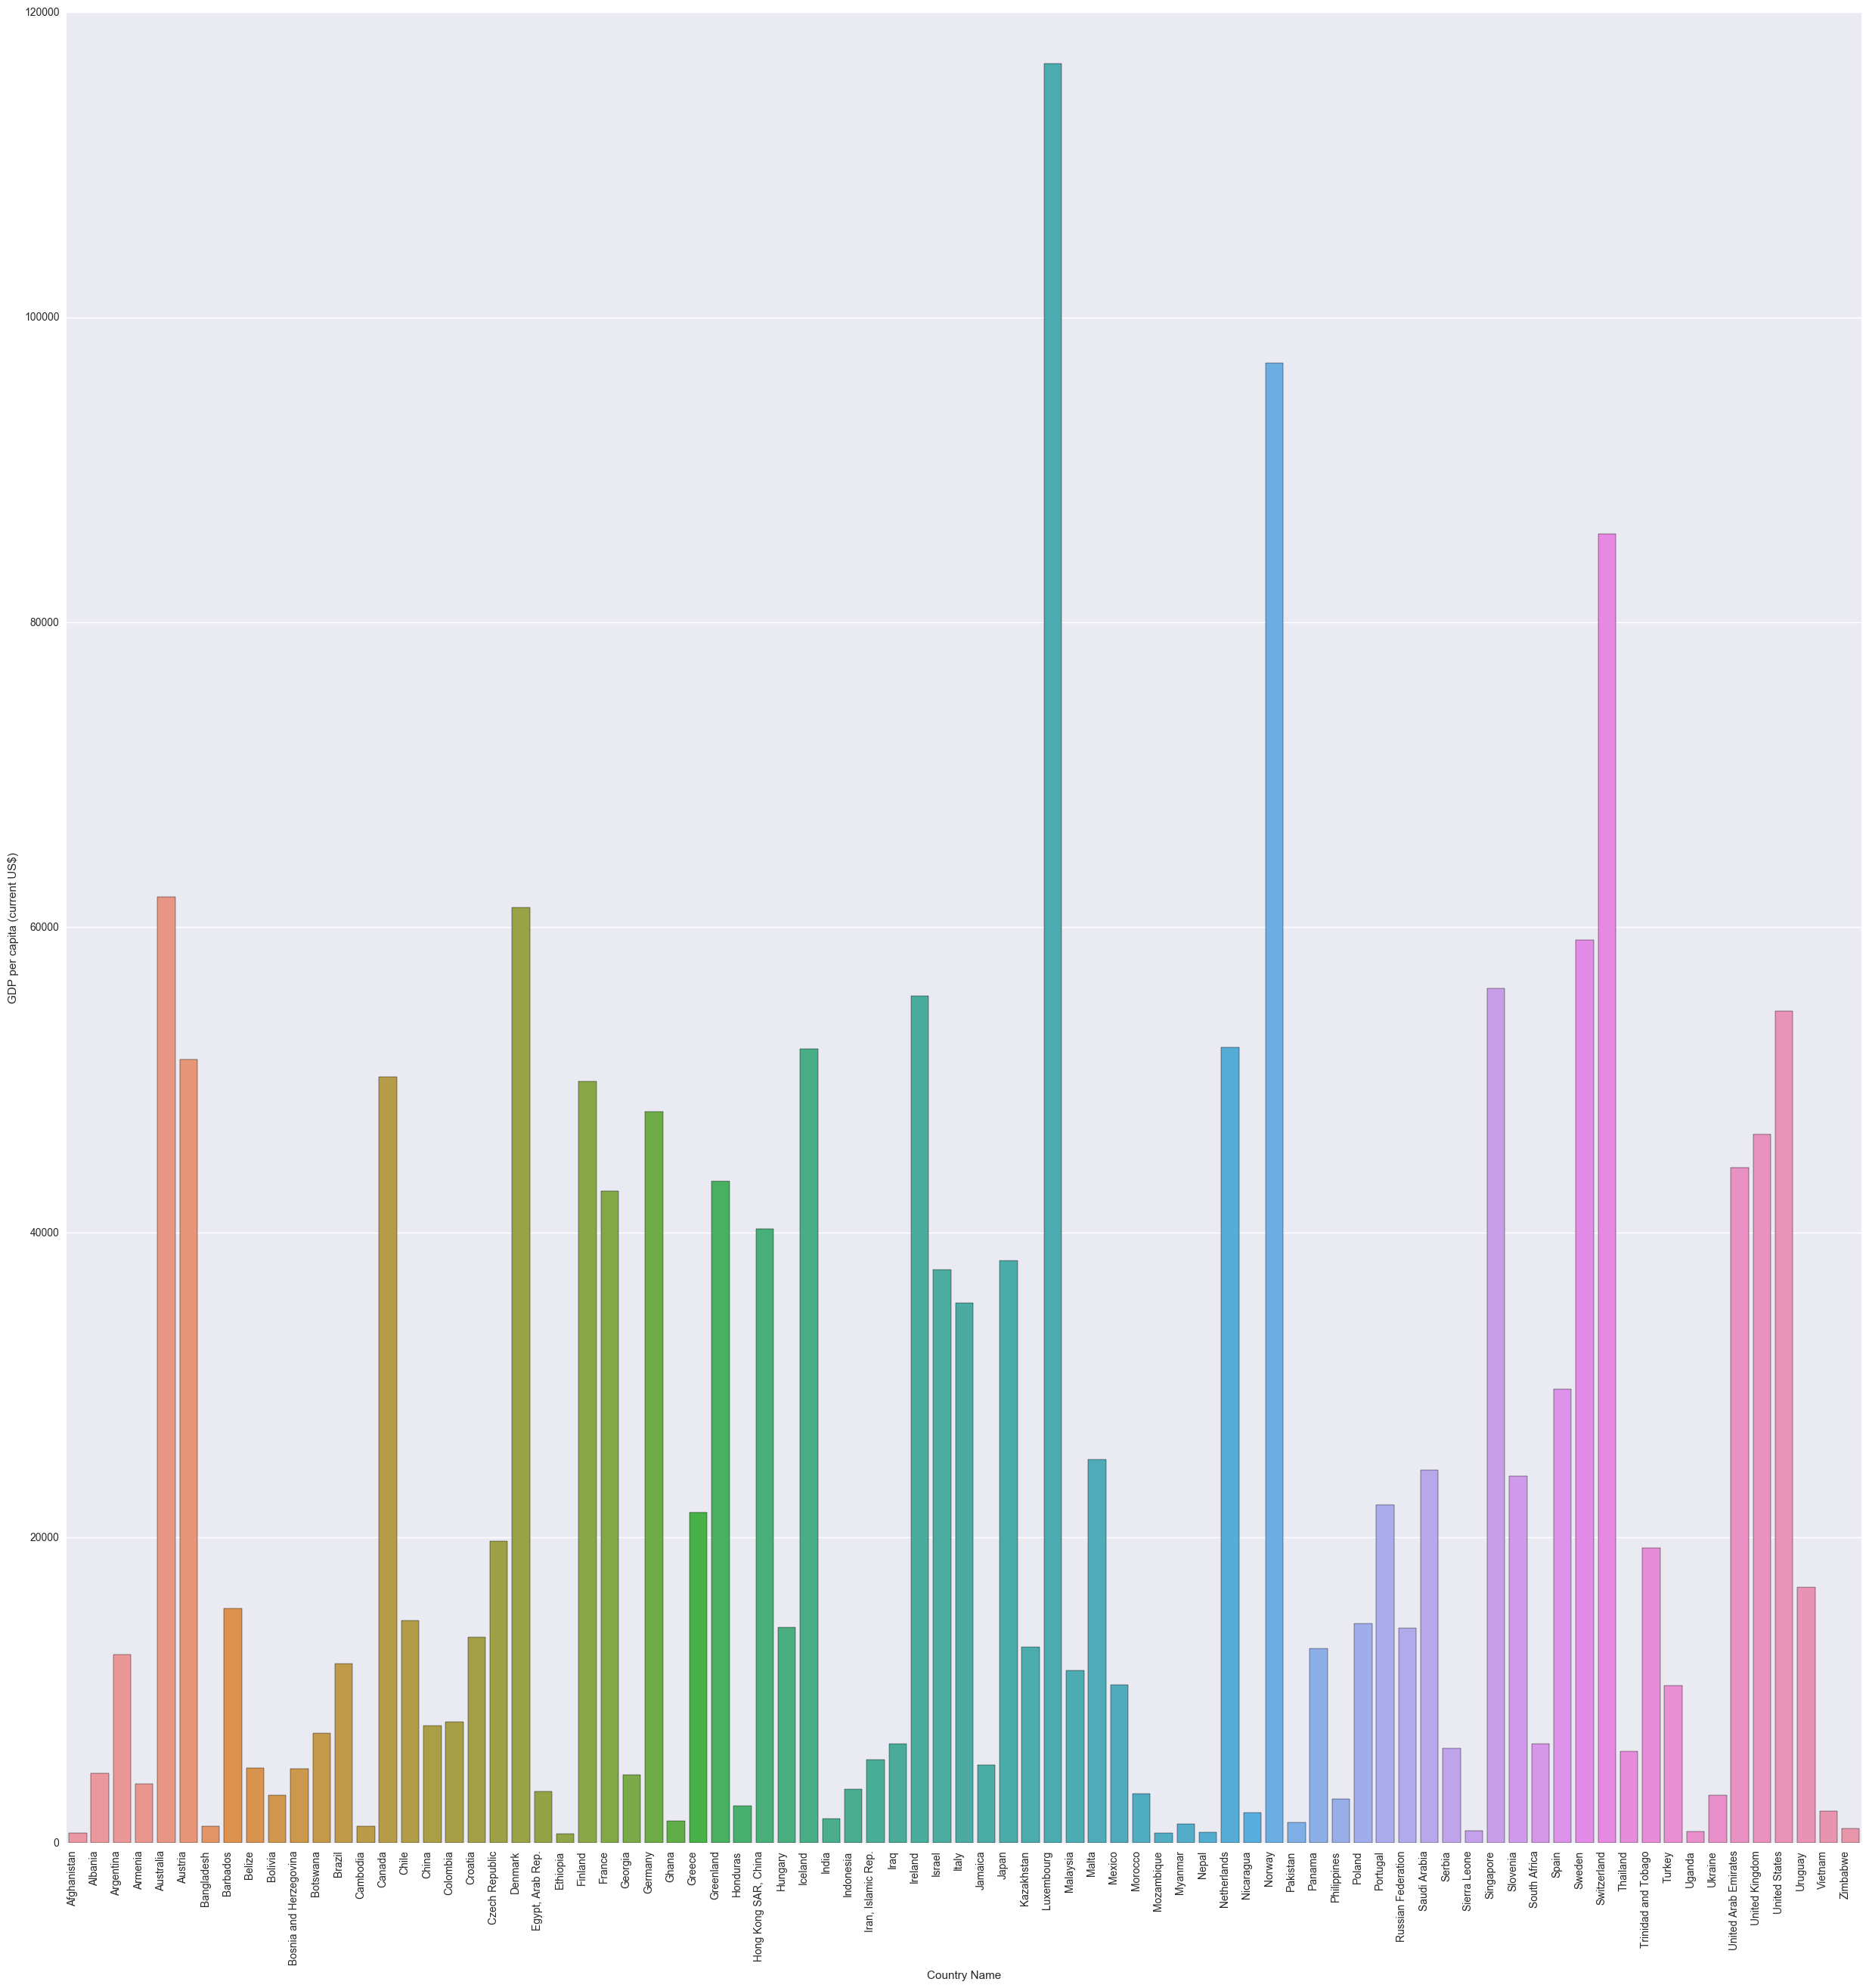

In [14]:
p = sb.factorplot(x='Country Name', 
              y='GDP per capita (current US$)',
              kind='bar',
              data = df_dropcolumns,
              size = 25
            )
p.set_xticklabels(rotation=90, horizontalalignment='right')

In [15]:
p.savefig("percapitaGDP.png")

## LM Plot

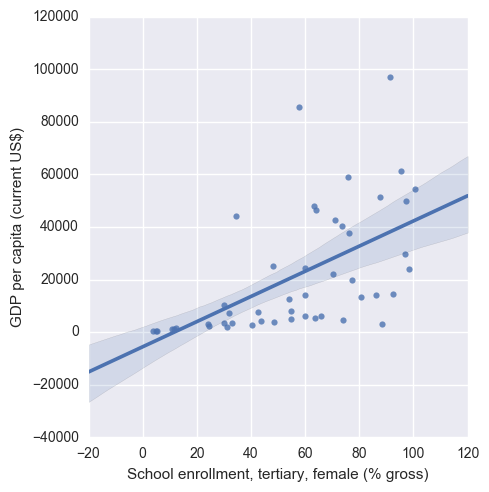

In [16]:
sb.lmplot('School enrollment, tertiary, female (% gross)', 'GDP per capita (current US$)', df_dropcolumns).savefig("tertiaryschool.png")

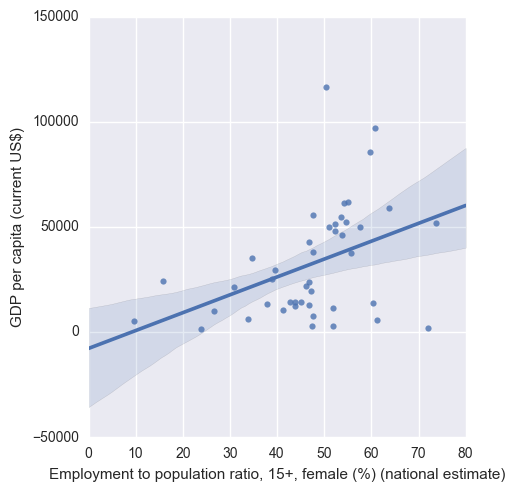

In [17]:
sb.lmplot('Employment to population ratio, 15+, female (%) (national estimate)','GDP per capita (current US$)', df_dropcolumns).savefig("employment.png")

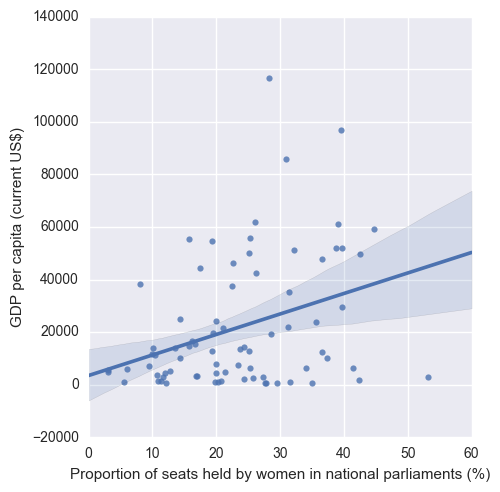

In [18]:
sb.lmplot('Proportion of seats held by women in national parliaments (%)', 'GDP per capita (current US$)', df_dropcolumns).savefig("parliament.png")

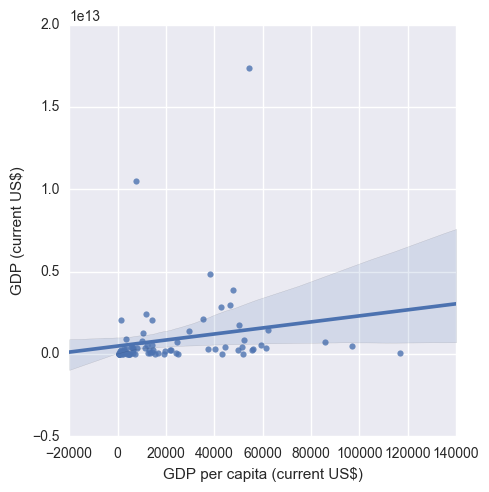

In [19]:
sb.lmplot('GDP per capita (current US$)','GDP (current US$)', df_dropcolumns)

## Linear Regression

In [20]:
X = df_dropcolumns[['School enrollment, primary, female (% gross)','School enrollment, secondary, female (% gross)','School enrollment, tertiary, female (% gross)','Employment to population ratio, 15+, female (%) (national estimate)','Proportion of seats held by women in national parliaments (%)']] 
y = df_dropcolumns[['GDP per capita (current US$)']]

lm = smf.ols(formula='y ~ X', data=df_dropcolumns).fit()

lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     3.440
Date:                Sun, 07 May 2017   Prob (F-statistic):             0.0221
Time:                        21:12:15   Log-Likelihood:                -279.80
No. Observations:                  25   AIC:                             571.6
Df Residuals:                      19   BIC:                             578.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -2.899e+04   8.37e+04     -0.347      0.733     -2.04e+05  1.46e+05
X[0]         152.0616    825.406      0.184      0.856     -1575.533  1879.656
X[1]        -225.0029    383.354     -0.587      0.564     -1027.372   577.366
X[2]         132.7019    282.682      0.469      0.644      -458.959   724.363
X[3]         704.8647    385.713      1.827      0.083      -102.443  1512.172
X[4]        1107.0335    488.728      2.265      0.035        84.113  2129.954
==============================================================================
Omnibus:                        0.895   Durbin-Watson:                   2.616
Prob(Omnibus):                  0.639   Jarque-Bera (JB):                0.882
Skew:                           0.382   Prob(JB):                        0.643
Kurtosis:                       2.485   Cond. No.                     3.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
X = df_dropcolumns[['School enrollment, tertiary, female (% gross)','Employment to population ratio, 15+, female (%) (national estimate)','Proportion of seats held by women in national parliaments (%)']] 
y = df_dropcolumns[['GDP per capita (current US$)']]

lm = smf.ols(formula='y ~ X', data=df_dropcolumns).fit()

lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     6.445
Date:                Sun, 07 May 2017   Prob (F-statistic):            0.00234
Time:                        21:12:16   Log-Likelihood:                -314.79
No. Observations:                  28   AIC:                             637.6
Df Residuals:                      24   BIC:                             642.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -3.604e+04   1.95e+04     -1.846      0.077     -7.63e+04  4254.162
X[0]         335.9369    193.741      1.734      0.096       -63.925   735.799
X[1]         335.1493    312.543      1.072      0.294      -309.909   980.207
X[2]        1056.1048    359.989      2.934      0.007       313.124  1799.086
==============================================================================
Omnibus:                        4.327   Durbin-Watson:                   2.223
Prob(Omnibus):                  0.115   Jarque-Bera (JB):                3.038
Skew:                           0.795   Prob(JB):                        0.219
Kurtosis:                       3.276   Cond. No.                         479.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
X = df_dropcolumns[['School enrollment, tertiary, female (% gross)','Employment to population ratio, 15+, female (%) (national estimate)']] 
y = df_dropcolumns[['GDP per capita (current US$)']]

lm = smf.ols(formula='y ~ X', data=df_dropcolumns).fit()

lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     4.113
Date:                Sun, 07 May 2017   Prob (F-statistic):             0.0286
Time:                        21:12:16   Log-Likelihood:                -319.08
No. Observations:                  28   AIC:                             644.2
Df Residuals:                      25   BIC:                             648.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -3.105e+04   2.22e+04     -1.398      0.174     -7.68e+04  1.47e+04
X[0]         451.2457    216.660      2.083      0.048         5.026   897.465
X[1]         613.2076    340.130      1.803      0.083       -87.304  1313.719
==============================================================================
Omnibus:                        2.735   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                1.636
Skew:                           0.577   Prob(JB):                        0.441
Kurtosis:                       3.268   Cond. No.                         458.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""